In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

In [2]:
from scrinet import fits

# gen data

In [3]:
def gen_data(X):
    y = X[:,0] * np.sin(X[:,0]*10) + 1 + .4 * np.sin(X[:,1]) + 3.4 * np.sin(X[:,2])
    y += np.random.uniform(0, 0.01, size=(len(y)))
    return y

In [4]:
# generate some fake data
x = np.linspace(0,1,15)
xx, yy, zz = np.meshgrid(x,x,x)
xx = xx.ravel()
yy = yy.ravel()
zz = zz.ravel()
X = np.zeros(shape=(len(xx), 3))
X[:,0] = xx
X[:,1] = yy
X[:,2] = zz

y = gen_data(X)

In [5]:
# validation data
# generate some fake data
x = np.linspace(0,1,20)
xx, yy, zz = np.meshgrid(x,x,x)
xx = xx.ravel()
yy = yy.ravel()
zz = zz.ravel()
X_val = np.zeros(shape=(len(xx), 3))
X_val[:,0] = xx
X_val[:,1] = yy
X_val[:,2] = zz

y_val = gen_data(X_val)

In [6]:
scale = False
if scale:
    X, y, X_val, y_val = fits.scale.scale_data(X, y, (X_val, y_val))

Text(0.5, 1.0, 'training set')

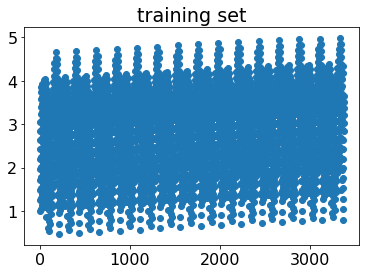

In [7]:
plt.figure()
plt.scatter(range(len(y)), y)
plt.title("training set")

Text(0.5, 1.0, 'validation set')

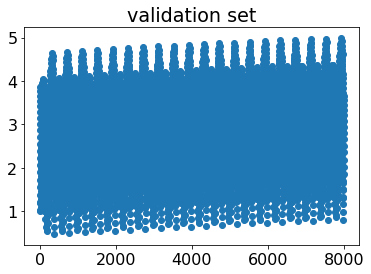

In [8]:
plt.figure()
plt.scatter(range(len(y_val)), y_val)
plt.title("validation set")

# import scrinet and perform fits

In [40]:
max_degs = fits.poly.generate_degrees([9,9,9], max_deg_total=9*3)

In [41]:
len(max_degs)

1000

In [42]:
for i, deg in enumerate(max_degs):
    print(f"{i}, {deg}")

0, [0 0 0]
1, [0 0 1]
2, [0 0 2]
3, [0 0 3]
4, [0 0 4]
5, [0 0 5]
6, [0 0 6]
7, [0 0 7]
8, [0 0 8]
9, [0 0 9]
10, [1 0 0]
11, [1 0 1]
12, [1 0 2]
13, [1 0 3]
14, [1 0 4]
15, [1 0 5]
16, [1 0 6]
17, [1 0 7]
18, [1 0 8]
19, [1 0 9]
20, [2 0 0]
21, [2 0 1]
22, [2 0 2]
23, [2 0 3]
24, [2 0 4]
25, [2 0 5]
26, [2 0 6]
27, [2 0 7]
28, [2 0 8]
29, [2 0 9]
30, [3 0 0]
31, [3 0 1]
32, [3 0 2]
33, [3 0 3]
34, [3 0 4]
35, [3 0 5]
36, [3 0 6]
37, [3 0 7]
38, [3 0 8]
39, [3 0 9]
40, [4 0 0]
41, [4 0 1]
42, [4 0 2]
43, [4 0 3]
44, [4 0 4]
45, [4 0 5]
46, [4 0 6]
47, [4 0 7]
48, [4 0 8]
49, [4 0 9]
50, [5 0 0]
51, [5 0 1]
52, [5 0 2]
53, [5 0 3]
54, [5 0 4]
55, [5 0 5]
56, [5 0 6]
57, [5 0 7]
58, [5 0 8]
59, [5 0 9]
60, [6 0 0]
61, [6 0 1]
62, [6 0 2]
63, [6 0 3]
64, [6 0 4]
65, [6 0 5]
66, [6 0 6]
67, [6 0 7]
68, [6 0 8]
69, [6 0 9]
70, [7 0 0]
71, [7 0 1]
72, [7 0 2]
73, [7 0 3]
74, [7 0 4]
75, [7 0 5]
76, [7 0 6]
77, [7 0 7]
78, [7 0 8]
79, [7 0 9]
80, [8 0 0]
81, [8 0 1]
82, [8 0 2]
83, [8 0 3]
84

In [43]:
best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs), (lowest_deg_v, v_losses, v_AICs, v_AICcs, v_BICs) = \
    fits.poly.findpolyfit(X, y, max_degs=max_degs, validation_data=(X_val, y_val), verbose=False)


In [44]:
best_deg_idx

393

In [45]:
max_degs[best_deg_idx]

array([9, 3, 3])

Text(0.5, 1.0, 'training set')

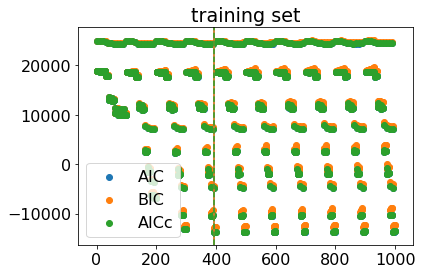

In [46]:
plt.figure()
plt.scatter(range(len(t_AICs)), t_AICs, label='AIC')
plt.scatter(range(len(t_AICs)), t_BICs, label='BIC')
plt.scatter(range(len(t_AICs)), t_AICcs, label='AICc')

plt.axvline(np.argmin(t_AICs), c='C0')
plt.axvline(np.argmin(t_BICs), c='C1')
plt.axvline(np.argmin(t_AICcs), ls='--', c='C2')

plt.legend()
plt.title('training set')

Text(0.5, 1.0, 'validation set')

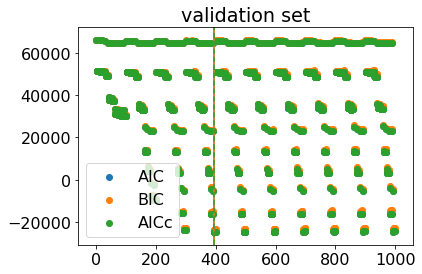

In [47]:
plt.figure()
plt.scatter(range(len(t_AICs)), v_AICs, label='AIC')
plt.scatter(range(len(t_AICs)), v_BICs, label='BIC')
plt.scatter(range(len(t_AICs)), v_AICcs, label='AICc')

plt.axvline(np.argmin(v_AICs), c='C0')
plt.axvline(np.argmin(v_BICs), c='C1')
plt.axvline(np.argmin(v_AICcs), ls='--', c='C2')

plt.legend()
plt.title('validation set')

Text(0, 0.5, '$loss$')

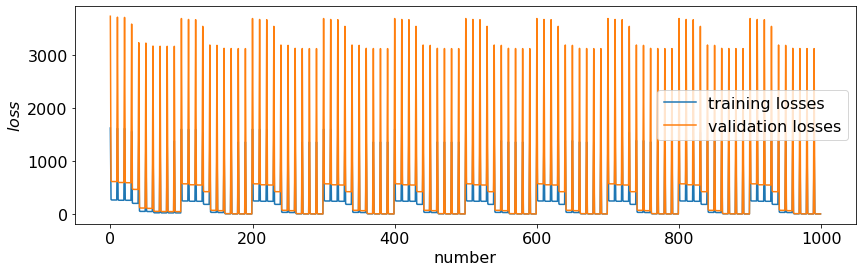

In [48]:
plt.figure(figsize=(14,4))
plt.plot(range(len(t_AICs)), t_losses, label='training losses')
plt.plot(range(len(t_AICs)), v_losses, label='validation losses')
plt.legend()
plt.xlabel('number')
plt.ylabel(r'$loss$')

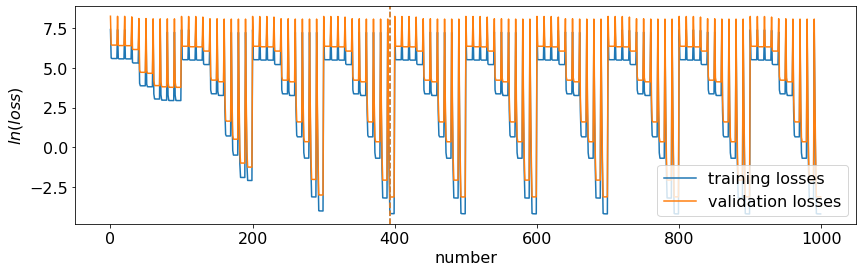

In [49]:
plt.figure(figsize=(14,4))
plt.plot(range(len(t_AICs)), np.log(t_losses), label='training losses')
plt.plot(range(len(t_AICs)), np.log(v_losses), label='validation losses')
plt.legend(loc='lower right')
plt.xlabel('number')
plt.ylabel(r'$ln(loss)$')

plt.axvline(lowest_deg_t, c='C0', ls='--')
plt.axvline(lowest_deg_v, c='C1', ls='--')


In [50]:
tloss = best_lr.loss(X, y, method='sum-of-squares')
vloss = best_lr.loss(X_val, y_val, method='sum-of-squares')

In [51]:
print(tloss)

0.016057770222910002


In [52]:
print(vloss)

0.045049720868978


In [53]:
%%timeit
best_lr.predict(X_val[0].reshape(-1,1))

1.04 ms ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


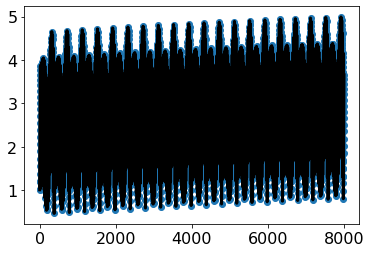

In [54]:
plt.figure()
plt.scatter(range(len(y_val)), y_val, label='validation')
plt.plot(range(len(y_val)), best_lr.predict(X_val), lw=3, c='k', label='final fit')